# 🐶 End-to-end multi-class Dog breed Classification
This notebook builds and end-to-end multi-class image classifier using TensorFlow 2.0 and tensorFlow Hub.

## 1. Problem

Identifiying the breed of a dog given an image of a dog.

## 2. Data
The data we're using is from Kaggles dog breed identification competition.
https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for eacg dog breed of each test image.

## 4. Features

Some information about the data:
* We're dealing with images (unstructered data) so it's probably best we use deep learning/transfer learning.
* There are around 10,000+ images in the training set (these have labels)
There are around 10,000+ images in the test set (these doesn't have labels, because we will have to predict them)

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/"

## Get your workspace ready

1.   Import TensorFlow 2.x
2.   Import TensorFlow Hub
3.   Make sure we're using a GPU



In [8]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print ("TF Hub version", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSS!!!)" if tf.config.list_physical_devices("GPU") else ("not available"))

TF version 2.15.0
TF Hub version 0.15.0
GPU available (YESSS!!!)


## Getting or data ready (turning into Tensors)
Lets start by accessing our data and checking out the labels

In [9]:
# Checkout the labels of our data
import pandas as pd
labels_csv= pd.read_csv("/content/drive/MyDrive/Dog Vision/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [10]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

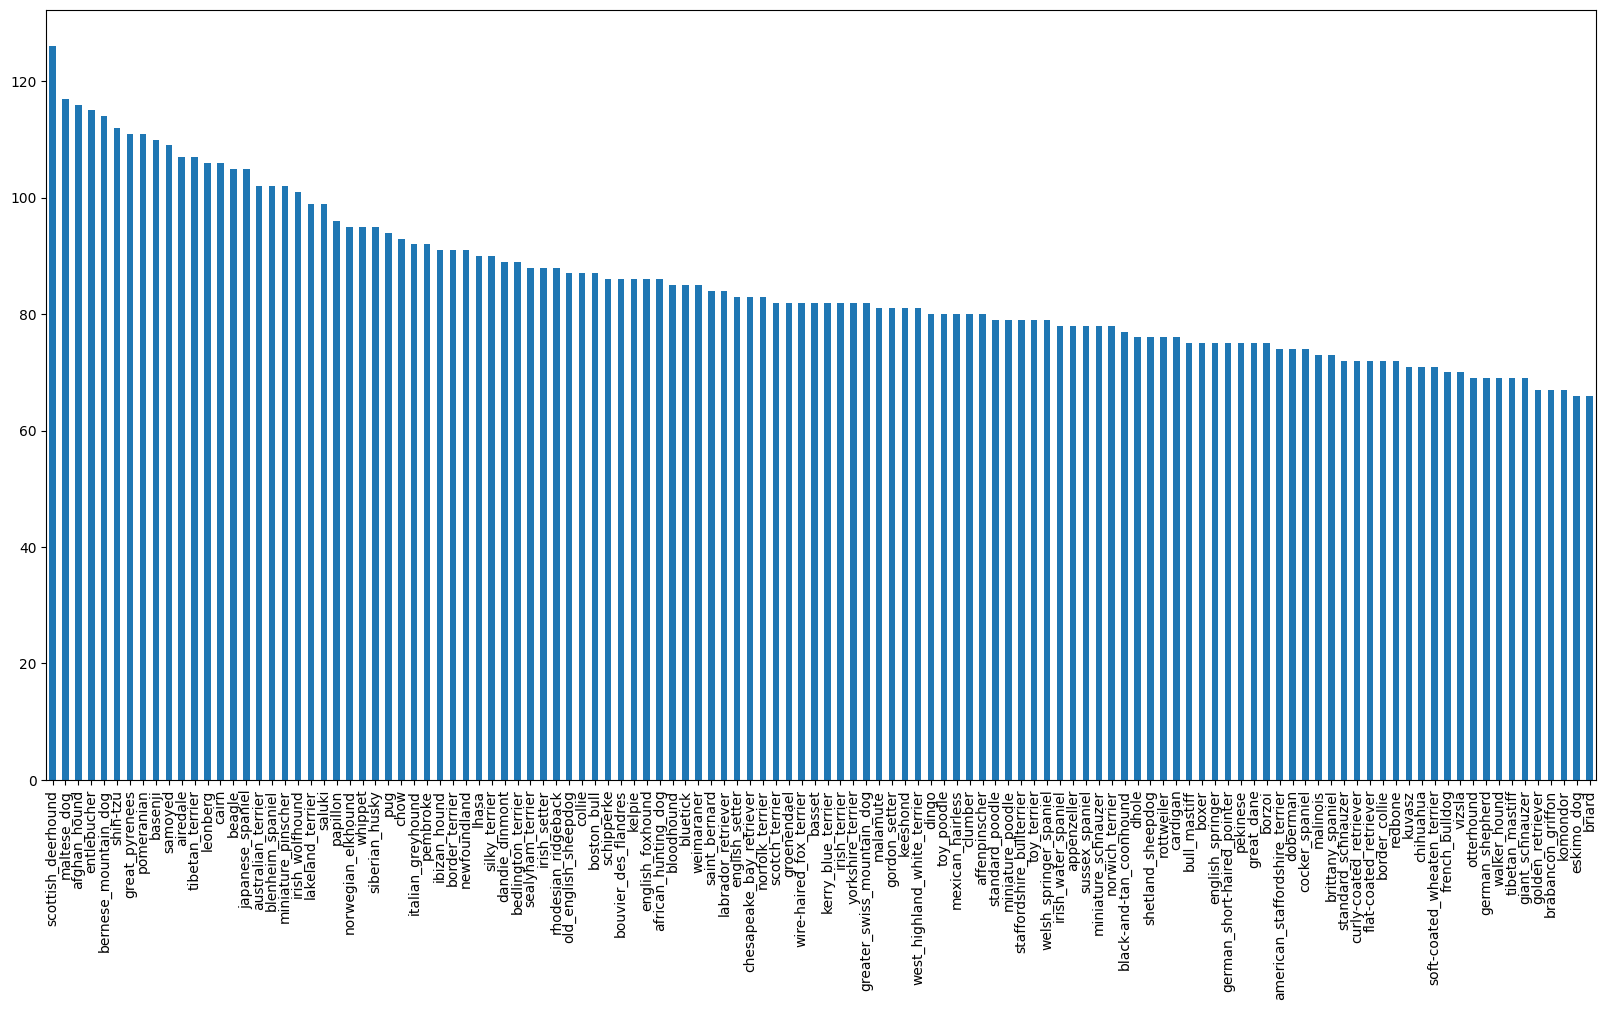

In [11]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [12]:
labels_csv["breed"].value_counts().median()

82.0

In [13]:
# Lets view an image
from IPython.display import Image

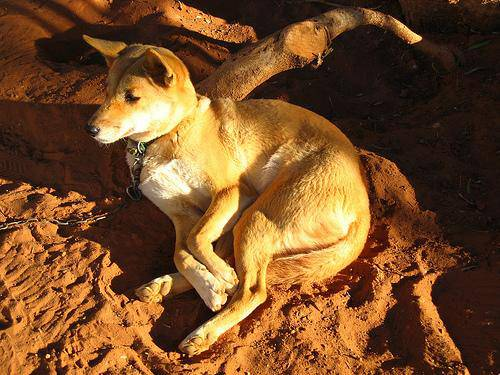

In [14]:
Image("/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting Images and their labels
Let's get a list of all of our image file pathnames

In [15]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [16]:
# Create pathnames from image IDs
filenames=["/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-

In [17]:
import os
os.listdir("//content/drive/MyDrive/Dog Vision/dog-breed-identification/train/")[:10]

['e146cd8f43b445baab08b03548c425c4.jpg',
 'e297c765ac7e6c1d7c4657c7e72b1544.jpg',
 'e3f184140f68b3502dfb048607556438.jpg',
 'e95bd9ab625ad1c16b513a13a27c447d.jpg',
 'e3104080c13200a90467f712dd2abd08.jpg',
 'e0010a83e9302a3abef2ca9b57f9c38b.jpg',
 'dc58e98a94ff4d49ff7242b5b860f167.jpg',
 'e89e6cbb5d616ef9904675b9e6db06b3.jpg',
 'e8baa7663b726cad8eefb319ca7d8195.jpg',
 'e0af99a3fd26fa2f9c601d782c5e7b6c.jpg']

In [18]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/"))==len(filenames):
  print("Filenames match actual amount of files")
else:
  print ("Filenames do not match actual amount of files")

Filenames do not match actual amount of files


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
len(filenames)

10222

In [21]:
len(os.listdir("/content/drive/MyDrive/Dog Vision/dog-breed-identification/train"))

10230

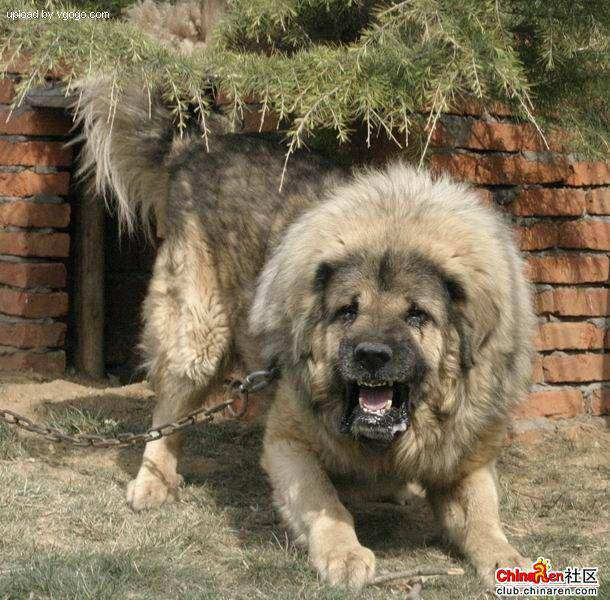

In [22]:
Image(filenames[9000])

In [23]:
labels_csv["breed"][9000]


'tibetan_mastiff'

Since we've got our training image filepath in a list, let's prepare our labels

In [24]:
import numpy as np
labels= labels_csv["breed"].to_numpy()
#labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [25]:
len(labels)

10222

In [26]:
# See if number of labels matches the number of filenames
if len(labels)== len(filenames):
  print("Number of labels matches the number of filenames")
else:
  print("Number of labels doesnt match the number of filenames")

Number of labels matches the number of filenames


In [27]:
# Find the unique label values
unique_breeds=np.unique(labels)

In [28]:
len(unique_breeds)

120

In [29]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [30]:
# Turn every label into a boolean array
boolean_labels= [label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [31]:
# Example: Turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds==labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [32]:
filenames[:10]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own

In [33]:
# Setup X and y variables
X= filenames
y= boolean_labels

In [34]:
len(y)

10222

We're goint to start off experimenting with ~1000 images and increase as needed

In [35]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 # @param {type:"slider", min:1000, max:10000, step:1}

In [36]:
# Lets split our data into train and validation sets
from sklearn.model_selection import train_test_split

#Split them into 2 training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val =train_test_split(X[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size=0.2,
                                                 random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [37]:
y_val[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [38]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Preprocessing images( turning images into tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable, `image`
3. Turn our image (a jpg) into tensors
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image`
Before we do, lets see what importing an image looks like

In [39]:
# Covert an image into numpy array
from matplotlib.pyplot import imread
image= imread(filenames[42])
image.shape

(257, 350, 3)

In [40]:
# Turn image into tensors
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Now we've seen what an image looks like as atensor lets make a function to preprocess them

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable, image
3. Turn our image (a jpg) into tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
4. Resize the image to be a shape of (224,224)
5. Return the modified image Before we do, lets see what importing an image looks like

In [41]:
# Define image size
IMG_SIZE= 224
# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor

  """
  # Read in an image file
  image= tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensors with 3 color channels (red, green, blue)
  image= tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image= tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value(224, 224)
  image= tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go....they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time.

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which looks like this: (`image`,`label`)

In [42]:
# Create a simple function ton return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, processes the image and returns a tuple of (image, label).
  """
  image= process_image(image_path)
  return image, label

In [43]:
# Demo of the above
(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X`& `y`) into batches!

In [44]:
# Define the batch size, 32 is a good size
BATCH_SIZE = 32

#Create a fucntion to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data=False, test_data= False):
  """
  Create batches pf data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validationn data.
  Also accepts test data as input (no labels).
  """
  # If the data is test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data =tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # IF the data is a valid dataset, we dom't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor is faster than shuffling images
    data= data.shuffle(buffer_size=len(X))
    # Create (image ,label) tuple (this also turns the image path into processed image)
    data= data.map(get_image_label)

    #Turn the training data into batches
    data_batch =data.batch(BATCH_SIZE)
  return data_batch


In [45]:
# Create training and validation data batches
train_data= create_data_batches(X_train, y_train)
val_data= create_data_batches(X_val, y_val, valid_data= True)

Creating training data batches...
Creating validation data batches...


In [46]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches

Our data is in batches, however, these can be a little hard to understand, let's visualize the data

In [47]:
import matplotlib.pyplot as plt

# Create a funtion for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots(5 rows, 5 columns)
    ax= plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [48]:
train_images, train_labels= next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

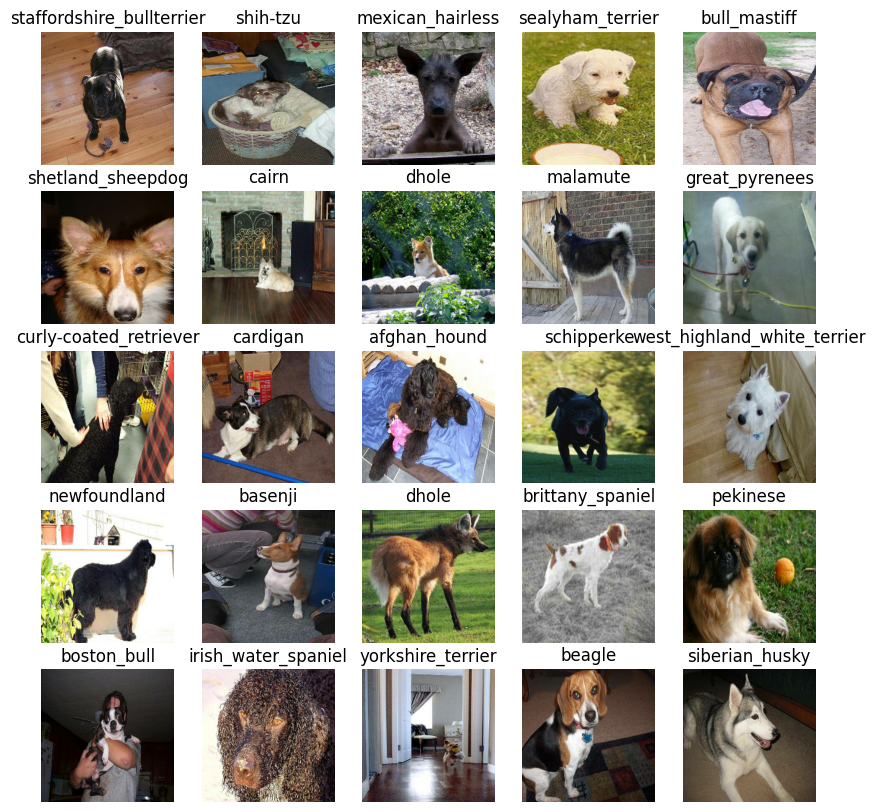

In [49]:
show_25_images(train_images,train_labels)

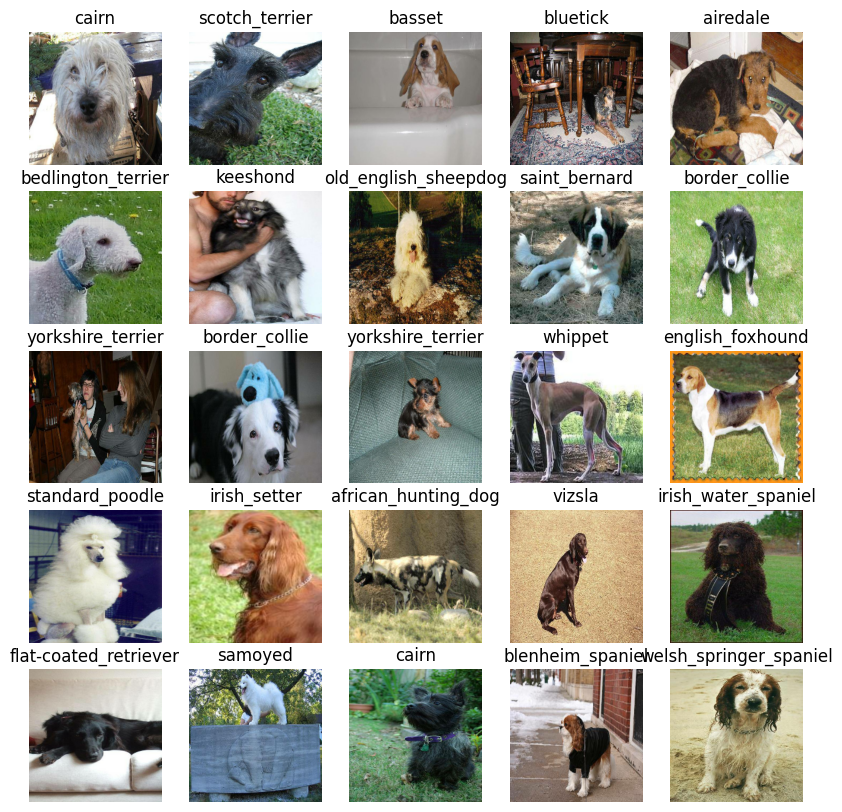

In [50]:
# Now let's visualize our validation set
val_images, val_labels= next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape(our images shape, in the form of tensors) to our model.
* The output shape (image lables, in the form of Tensors) of our model.
* The URL of the model we want to use.

In [51]:
# setup input shape to the model
INPUT_SHAPE =[None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channles

# Setup output shape of our model
OUTPUT_SHAPE=len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL= "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2"

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this lets create a function which :
* Takes the inpu shape, output shape and the model we've chosen as parameters.
* defines the layers in a Keras model in sequential fashion(do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Return the model.
All of these steps can be found here:


In [52]:
# Create a funstion which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model=tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), #Layer 1(input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                         activation="softmax") # Layer 2(outpu layer)

  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]

  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [53]:
model= create_model()
model.summary()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks

Callback are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard callback

To setup a TensorBoard callback, we need to do 3 things:
1. load the tensorboard notebook extension :che:
2. create a tensorboard callback which is able to save logs to a directory and passs it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function.


In [54]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [55]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory fir storing TensorBoard logs
  logdir= os.path.join("/content/drive/MyDrive/Dog Vision/dog-breed-identification/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping traning if a certain metrics stops improving

In [56]:
# create early stopping callback
early_stopping= tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=3)

## Training a model (on a subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working

In [57]:
NUM_EPOCHS=100 #@param{type:"slider", min:10, max:100, step:10}

In [58]:
# check to make sure we're still running on a gpu
print("GPU", "available (YESSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available:(")

GPU available (YESSS!!!!)


Let's create a funtion which trains the model.

* Create a midel using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* call the `fit()` funtion on our model passing the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callback we'd like to use
* Return the model


In [59]:
# BUild a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained model

  """
  # Create a model
  model= create_model()

  # Create new TensorBoard sessons everytime we train the model
  tensorboard= create_tensorboard_callback()

  # Fit the model to data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [60]:
# Fit the model to the data
model=train_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Epoch 1/100
25/25 [==============================] - 192s 7s/step - loss: 4.5435 - accuracy: 0.0887 - val_loss: 3.3843 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 3s 100ms/step - loss: 1.6017 - accuracy: 0.7088 - val_loss: 2.1694 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 2s 99ms/step - loss: 0.5490 - accuracy: 0.9375 - val_loss: 1.6759 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 4s 165ms/step - loss: 0.2405 - accuracy: 0.9912 - val_loss: 1.5325 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 3s 102ms/step - loss: 0.1417 - accuracy: 0.9950 - val_loss: 1.4439 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 3s 102ms/step - loss: 0.0984 - accuracy: 1.0000 - val_loss: 1.3949 - val_accuracy: 0.6600
Epoch

**Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some ways to prevent model from overfitting in deep learning neural networks?

**Note:** Overfitting to begin with is a good thing it means our model is learning

### Checking the TensorBoard logs
The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Dog\ Vision/dog-breed-identification/logs


Launching TensorBoard...

## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
len(y_val)

In [ ]:
predictions[0]

In [ ]:
len(predictions[0])

In [ ]:
np.sum(predictions[0])

In [ ]:
# First predictions
index=42
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

In [ ]:
unique_breeds[113]

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**Note:** Predcition probabilities are also known as confidence levels

In [ ]:
# Turn prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
  """
  Turns an array of predictions probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get predicted label based on an array of prediction probabilities
pred_label= get_pred_label(predictions[81])
pred_label

Now since our validaton data is still in batch dadaset,
we'll have to unbatchify it to make predictions

In [ ]:
val_data

In [ ]:
# create afunction to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched datasset of (image,label) Tensors and returns separate arrays of image and labels.
  """
  images= []
  labels= []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify. the validation data
val_images, val_labels= unbatchify(val_data)
val_images[0], val_labels[0]

In [ ]:
images_ = []
labels_ = []
# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

In [ ]:
get_pred_label(val_labels[0])

Now we've got ways to get:
* Prediction labels
* Validation labels
* Validation images

Let's make some function to make these all a it more visualize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """

  View the prediction, ground truth and image for sample n

  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]


  # Get the pred label
  pred_label= get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depening on if the prediction is right or wrong
  if pred_label == true_label:
    color= "green"
  else:
    color= "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color )



In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels= val_labels,
          images= val_images,
          n=77



)

Now we've got one function to visualize our models top predictions, let's make another to view our models top 10 predictions.

This function will:
  * Take an input of prediction probabilities array and a ground truth array and an integer
  * Find the prediction using `get_pred_label()`
  * Find the top 10
      * Prediction probabilities indexes
      * Prediction probabilities values
      * Prediction labels
  * Plot the top 10 prediction probability values and labels, coloring the true label green    

In [ ]:
predictions[0].argsort()[-10:][::-1]

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
   """
   Plus the top 10 highest prediction confidences along with the truth label for sample n.
   """
   pred_prob, true_label = prediction_probabilities[n], labels[n]

   # Get the predicted label
   pred_label= get_pred_label(pred_prob)

   # Find the top 10 prediction confidence indexes
   top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
   # Find the top 10 prediction confidence values
   top_10_pred_values = pred_prob[top_10_pred_indexes]
   # Find the top 10 prediction labels
   top_10_pred_labels = unique_breeds[top_10_pred_indexes]

   # Setup plot
   top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                      top_10_pred_values,
                      color="grey")
   plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")
   # CHange color of true label
   if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
   else:
    pass


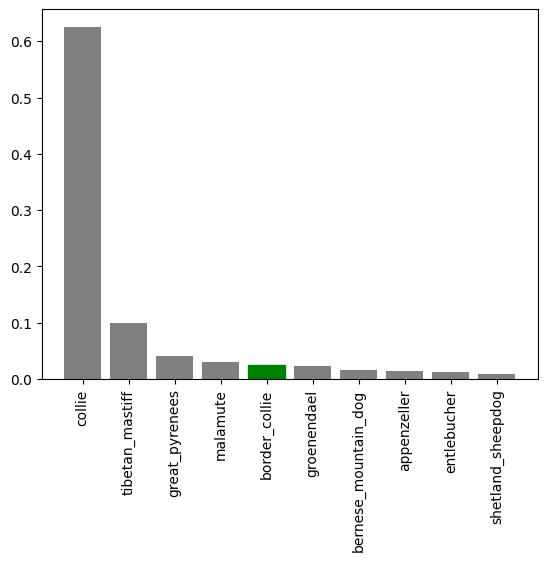

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functions to help us visualize our predictions and help us evaluet our model, let's check our a few predictions

In [ ]:
# Let's check our a few predictions amnd their different values
i_multiplier=20
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,

                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

 Challenge: How would you create a confusion matrix with our models predictions and true labels ?

## Saving and reloading a trained model

In [ ]:
from time import strftime
# create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir= os.path.join("/content/drive/MyDrive/Dog Vision/dog-breed-identification/models",
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format od model

  print (f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from {model_path}...")
  model= tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")


In [ ]:
# Load our trained model
loaded_1000_image_model =load_model("/content/drive/MyDrive/Dog Vision/dog-breed-identification/models/20240107-09011704618074-1000-images-mobilenetv2-Adam.h5")

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# Evaluate the saved model
loaded_1000_image_model.evaluate(val_data)